<div style="text-align: center">
    <h1 style="font-weight: bold">Milk Price Prediction</h1>
    <h4>Author: Sourasish Mondal</h4>
    <h5>My link: <a href="https://linktr.ee/souraOP">https://linktr.ee/souraOP</a></h5>
</div>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
df = pd.read_csv('monthly-milk-production.csv', index_col='Month')
df.index = pd.to_datetime(df.index)

In [5]:
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


<Axes: xlabel='Month'>

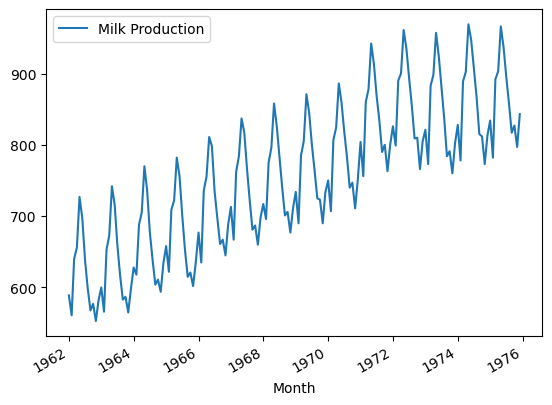

In [6]:
df.plot()

In [7]:
print(df.min())
print(df.max())

Milk Production    553.0
dtype: float64
Milk Production    969.0
dtype: float64


## Scaling the data 

- Scaling the data in the range between 0 and 1
- also we are reshaping the data in an array of one column and n rows
- Using MinMaxScaler: (x - x_min)/(x_max - x_min)

In [14]:
scaler = MinMaxScaler()

dummy_array = []
# putting the Milk Productions inside of the dummy array

for i in range(len(df)):
    # so the 'i' represents the number of rows and 'Milk Production' only represents only one column
    dummy_array.append(df.iloc[i]['Milk Production'])

# we are reshaping our dummy array into 2D array instead of 1D
dummy_array = np.array(dummy_array).reshape(-1, 1)
dummy_array = scaler.fit_transform(dummy_array)
dummy_array

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

## Creating the training dataset

- we are taking 12 items from the dataset as training set and the 13th one is the training label
- reason: we will train our data on 12 months data and ask our model to predict the production of the 13th month (1st month of next year)

In [15]:
train_labels = []
train_data = []
z = 0
for i in range (len(dummy_array)):
    try:
        # row = 12*z and column = 12 * (z+1) 
        train_data.append(dummy_array[12*z:12*(z+1)])
        train_labels.append(dummy_array[12*(z+1)])
        z += 1
    except:
        break
        

- Here the train data will have the first array as the first 12 points of the array
- The corresponding train label will be the 13th entry in the array

In [31]:
train_data = np.array(train_data)
print("The training data is: ")
print(train_data)
print("Shape of Train data : ", train_data.shape)
train_labels = np.array(train_labels)
print("The training labels is: ")
print(train_labels)
print("Shape of train labels: ", train_labels.shape)

The training data is: 
[[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
  0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
 [0.11298077 0.03125    0.24038462 0.28846154 0.45432692 0.39182692
  0.25721154 0.15384615 0.07211538 0.08173077 0.02884615 0.10817308]
 [0.18028846 0.15625    0.32451923 0.36538462 0.52163462 0.43990385
  0.30048077 0.20673077 0.12259615 0.13942308 0.09855769 0.19471154]
 [0.25240385 0.16586538 0.375      0.40625    0.55048077 0.48798077
  0.35817308 0.24038462 0.14903846 0.16346154 0.11778846 0.19711538]
 [0.29807692 0.19711538 0.43990385 0.48557692 0.62019231 0.58894231
  0.4375     0.34615385 0.25961538 0.27403846 0.22115385 0.32451923]
 [0.38461538 0.27403846 0.50240385 0.55528846 0.68269231 0.63461538
  0.51442308 0.40625    0.30769231 0.32211538 0.25721154 0.34855769]
 [0.39423077 0.34375    0.53365385 0.58413462 0.73317308 0.65625
  0.55288462 0.44951923 0.35576923 0.36778846 0.29807692 0.37980769]
 [0.43509615 0.329326

## Changing the data in shape so that it fits the Keras required shape

- We have to expand the dimensions of the train data using the numpy expand
- Using the np.expand_dims() we need to expand the dimensions to one dimensional

In [43]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data, axis=1)

# we need to reshape the data to 13, 1, 12 inorder to fit into the keras model shape
train_data = train_data.reshape(train_data.shape[0], 1, train_data.shape[-1])
print("Our training data after expanding the dimensions it becomes as: \n")
print(train_data)
print("\nThe required shape is given by: ", train_data.shape)

Our training data after expanding the dimensions it becomes as: 

[[[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
   0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]]

 [[0.11298077 0.03125    0.24038462 0.28846154 0.45432692 0.39182692
   0.25721154 0.15384615 0.07211538 0.08173077 0.02884615 0.10817308]]

 [[0.18028846 0.15625    0.32451923 0.36538462 0.52163462 0.43990385
   0.30048077 0.20673077 0.12259615 0.13942308 0.09855769 0.19471154]]

 [[0.25240385 0.16586538 0.375      0.40625    0.55048077 0.48798077
   0.35817308 0.24038462 0.14903846 0.16346154 0.11778846 0.19711538]]

 [[0.29807692 0.19711538 0.43990385 0.48557692 0.62019231 0.58894231
   0.4375     0.34615385 0.25961538 0.27403846 0.22115385 0.32451923]]

 [[0.38461538 0.27403846 0.50240385 0.55528846 0.68269231 0.63461538
   0.51442308 0.40625    0.30769231 0.32211538 0.25721154 0.34855769]]

 [[0.39423077 0.34375    0.53365385 0.58413462 0.73317308 0.65625
   0.55288462 0.449519

In [46]:
print("Checking the training data: ");
print(train_data[1])
print("\nChecking the training labels: ")
print(train_labels[1])

Checking the training data: 
[[0.11298077 0.03125    0.24038462 0.28846154 0.45432692 0.39182692
  0.25721154 0.15384615 0.07211538 0.08173077 0.02884615 0.10817308]]

Checking the training labels: 
[0.18028846]


## Time to create the model

- as far now we have done upto 4 stages
- Stage 1: Loading the data
- Stage 2: Scaling the data using MinMaxScaler
- Stage 3: Creating the training dataset
- Stage 4: Reshaping our data into the required shape into keras format

<p>Now we have to build the model</p>

In [48]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation

In [51]:
model = Sequential()

model.add(LSTM(250, input_shape=(1, 12)))
model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()


2024-06-24 23:15:29.293431: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-24 23:15:29.293545: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-24 23:15:29.293565: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-24 23:15:29.293869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-24 23:15:29.293910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequent

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 250)            │       263,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,775 (1.25 MB)

 Trainable params: 328,775 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
epoch = 1000

history = model.fit(train_data, train_labels, epochs=epoch)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0269
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0298
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0257
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0470
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0593
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0355
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0786
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0171
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0497
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0698
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0359
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0126
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0620
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0202
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0370
Epoc

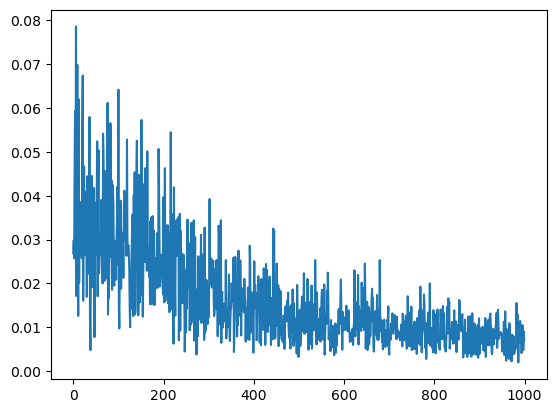

In [54]:
epochs = range(0, epoch)
loss = history.history['loss']
plt.plot(epochs, loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


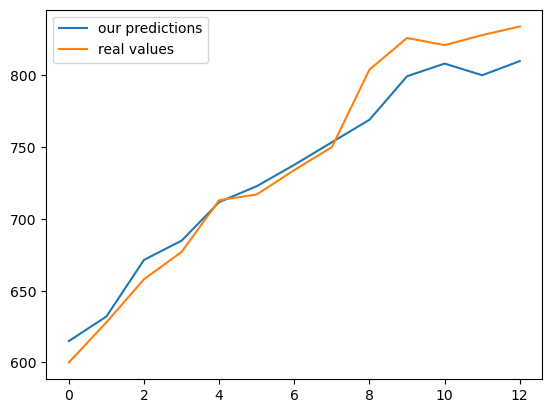

In [55]:
preds = scaler.inverse_transform(model.predict(train_data))
plt.plot(range(0,13),preds,label='our predictions')
plt.plot(range(0,13),scaler.inverse_transform(train_labels),label='real values')
plt.legend()

## Creating the seed for next year's 

In [58]:
seed = dummy_array[-12:]
print(seed)
print(seed.shape)


[[0.67548077]
 [0.55048077]
 [0.81490385]
 [0.84134615]
 [0.99278846]
 [0.92307692]
 [0.82451923]
 [0.73317308]
 [0.63461538]
 [0.65865385]
 [0.58653846]
 [0.69711538]]
(12, 1)


In [65]:
for _ in range(12):
    this_month_12 = seed[-12:]
    this_month_12 = np.squeeze(this_month_12)
    this_month_12 = np.expand_dims(this_month_12, 0)
    this_month_12 = np.expand_dims(this_month_12, 0)
    my_predictions= model.predict(this_month_12)
    seed = np.append(seed, my_predictions)

seed

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([0.67548077, 0.55048077, 0.81490385, 0.84134615, 0.99278846,
       0.92307692, 0.82451923, 0.73317308, 0.63461538, 0.65865385,
       0.58653846, 0.69711538, 0.63698268, 0.64916384, 0.67888278,
       0.70139104, 0.7145102 , 0.71161944, 0.70031202, 0.69047701,
       0.68733084, 0.68614626, 0.67890489, 0.67785251])

## Plotting my predictions

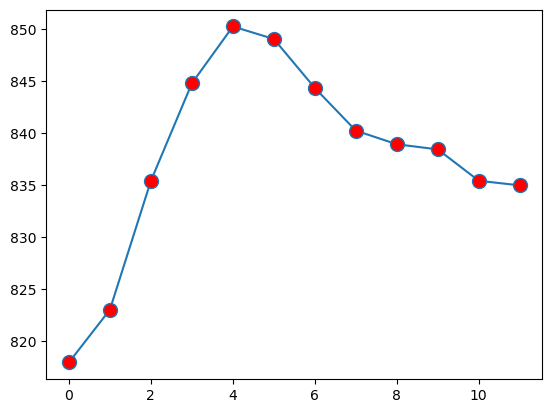

In [66]:
next_year_predictions= scaler.inverse_transform(seed[-12:].reshape(-1, 1))
plt.plot(range(0, 12), next_year_predictions, marker='o', markerfacecolor='red', markersize=10)